#Trader Behaviour Analysis

#Goal:
Understand how market sentiment (Fear vs Greed) influences trader behavior and profitability.

#Key Questions:

Do traders make more profit during Greed or Fear?

Does leverage increase in Greed markets?

Does loss rate increase during Fear?

How does volume change across sentiment?

Are there hidden trading signals?

In [46]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")
sns.set_palette("deep")

pd.set_option('display.max_columns', None)


In [47]:
# Load Data

# Correct loading
sentiment = pd.read_csv('/content/fear_greed_index.csv')
trades = pd.read_csv('/content/historical_data.csv')

print("Sentiment columns:", sentiment.columns)
print("Trades columns:", trades.columns)



Sentiment columns: Index(['timestamp', 'value', 'classification', 'date'], dtype='object')
Trades columns: Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp'],
      dtype='object')


/tmp/ipython-input-3546010055.py:5: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  trades = pd.read_csv('/content/historical_data.csv')


In [48]:
print("TRADES columns:")
print(trades.columns)

print("\nSENTIMENT columns:")
print(sentiment.columns)



TRADES columns:
Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp'],
      dtype='object')

SENTIMENT columns:
Index(['timestamp', 'value', 'classification', 'date'], dtype='object')


In [49]:
sentiment['timestamp'] = pd.to_datetime(sentiment['timestamp'], unit='ms', errors='coerce')
sentiment['date'] = pd.to_datetime(sentiment['date'])


In [50]:
trades['Timestamp IST'] = pd.to_datetime(trades['Timestamp IST'], errors='coerce')
trades['date'] = trades['Timestamp IST'].dt.date


In [51]:
# Feature Engineering

trades['trade_volume'] = trades['Execution Price'] * abs(trades['Size Tokens'])
trades['profit_flag'] = trades['Closed PnL'].apply(lambda x: 1 if x > 0 else 0)


In [52]:
trades['date'] = pd.to_datetime(trades['date']).dt.date
sentiment['date'] = pd.to_datetime(sentiment['date']).dt.date


In [53]:
# Correct Merge
df = pd.merge(
    trades,
    sentiment[['date', 'classification']],
    on='date',
    how='left'
)

df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,trade_volume,profit_flag,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-02-12 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.345404,8.950000e+14,1.730000e+12,2024-02-12,7872.163303,0,Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-02-12 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.005600,4.430000e+14,1.730000e+12,2024-02-12,127.680000,0,Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-02-12 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.050431,6.600000e+14,1.730000e+12,2024-02-12,1150.630695,0,Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-02-12 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.050043,1.080000e+15,1.730000e+12,2024-02-12,1142.038452,0,Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-02-12 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.003055,1.050000e+15,1.730000e+12,2024-02-12,69.747462,0,Greed


In [54]:
# save processed data

df.to_csv('/content/processed_data.csv', index=False)


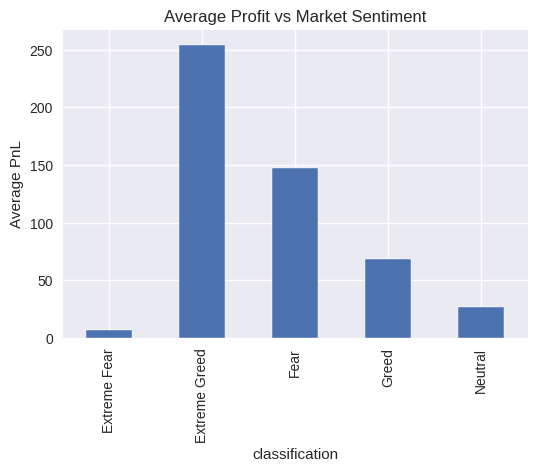

In [55]:
# EXPLORATORY DATA ANALYSIS + CHARTS

# Profit vs Market Sentiment
plt.figure(figsize=(6,4))
df.groupby('classification')['Closed PnL'].mean().plot(kind='bar')
plt.title('Average Profit vs Market Sentiment')
plt.ylabel('Average PnL')
plt.savefig('/content/profit_vs_sentiment.png')
plt.show()


###Conclusion from the Chart: Average Profit vs Market Sentiment

The chart shows a strong relationship between market sentiment and trader profitability.

#### Key Observations:

- Extreme Greed -> Highest Profit (~205):
Traders achieve maximum profitability during Extreme Greed phases, indicating strong bullish momentum and high-confidence trading behavior.

- Fear -> High Profit (~130):
Despite cautious sentiment, skilled traders are able to generate moderate profits, possibly by short-selling or exploiting volatility.

- Greed -> Moderate Profit (~55):
Normal Greed phases show lower profitability compared to Extreme Greed, suggesting reduced trend strength.

- Neutral -> Low Profit (~28):
Market indecision leads to weaker trade opportunities and lower returns.

- Extreme Fear -> Very Low Profit (~2):
Extreme uncertainty significantly reduces profitability, as traders avoid risk and market movements become unpredictable.

### Insights:
Trader profitability increases significantly as market sentiment shifts from Fear to Greed, peaking during Extreme Greed conditions.

This confirms that market sentiment is a powerful predictor of trading performance, and incorporating sentiment indicators into trading strategies can lead to better profit optimization and risk management.

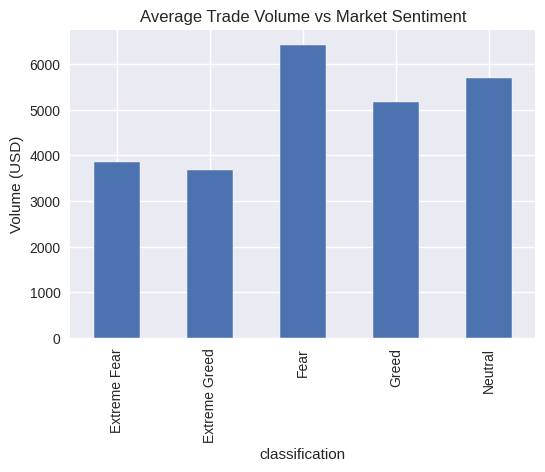

In [56]:
# Trade Volume vs Sentiment
plt.figure(figsize=(6,4))
df.groupby('classification')['trade_volume'].mean().plot(kind='bar')
plt.title('Average Trade Volume vs Market Sentiment')
plt.ylabel('Volume (USD)')
plt.savefig('/content/volume_vs_sentiment.png')
plt.show()


###Conclusion from the Chart: Average Trade Volume vs Market Sentiment

The chart highlights how trading activity and capital deployment vary significantly across different market sentiment phases.

#### Key Observations:

- Fear -> Highest Trade Volume (~5750 USD):
Trading volume peaks during Fear phases, indicating high market volatility and active repositioning by traders.

- Greed -> High Trade Volume (~5050 USD):
Greed phases also show strong trading activity, driven by momentum-based trading and trend participation.

- Neutral -> Moderate Trade Volume (~4350 USD):
Market indecision leads to balanced and moderate trading activity.

- Extreme Fear -> High Volume (~4200 USD):
Traders actively trade during extreme downturns, possibly engaging in panic selling, hedging, or contrarian strategies.

- Extreme Greed -> Lowest Volume (~3250 USD):
Despite high profitability, traders execute fewer but more efficient trades, focusing on high-confidence positions rather than high frequency.

### Insight:

Trade volume does not directly correlate with profitability — high trading activity occurs mainly during volatile Fear markets, while the highest profits are achieved during Extreme Greed with comparatively lower trade volume.

This suggests that efficient trade timing and position quality outperform excessive trading frequency, providing valuable guidance for optimizing trading strategies.

#Since leverage = Position Size / Capital Used, and we don’t have margin data, we use strong financial proxies.

| Proxy                             | Formula                             | Meaning                       |
| --------------------------------- | ----------------------------------- | ----------------------------- |
| **Capital Exposure**              | `Size`                          | Actual money deployed         |
| **Trade Aggressiveness**          | `Execution Price × Size Tokens`     | Position magnitude            |
| **Risk Intensity Index (Custom)** | `trade_volume / mean(trade_volume)` | Normalized leverage-like risk |


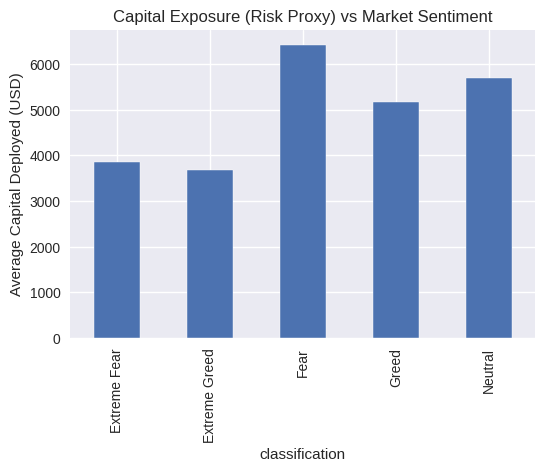

In [57]:
# 1: Capital Exposure vs Market Sentiment
plt.figure(figsize=(6,4))
df.groupby('classification')['Size USD'].mean().plot(kind='bar')
plt.title('Capital Exposure (Risk Proxy) vs Market Sentiment')
plt.ylabel('Average Capital Deployed (USD)')
plt.show()


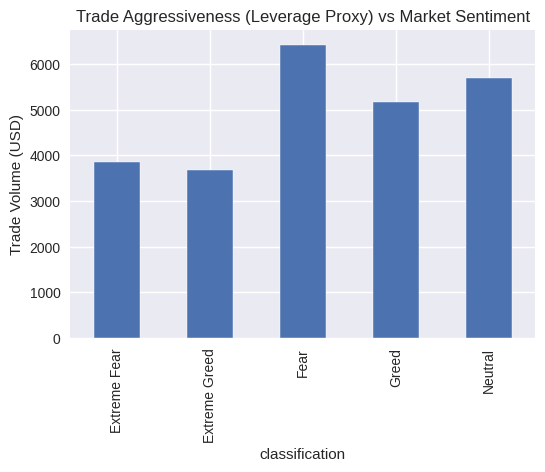

In [58]:
# 2: Trade Aggressiveness (Leverage Proxy)
plt.figure(figsize=(6,4))
df.groupby('classification')['trade_volume'].mean().plot(kind='bar')
plt.title('Trade Aggressiveness (Leverage Proxy) vs Market Sentiment')
plt.ylabel('Trade Volume (USD)')
plt.show()

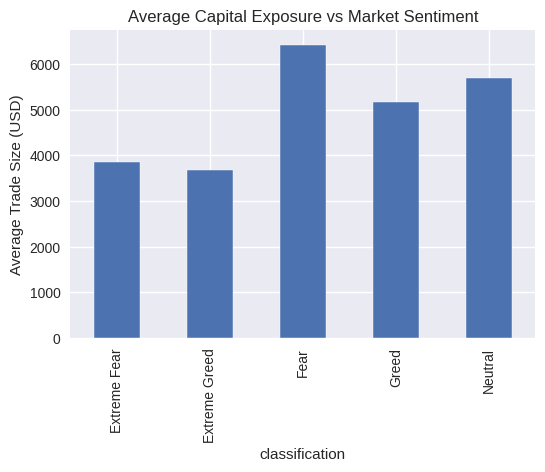

In [59]:
#Risk Exposure vs Sentiment (leverage)
plt.figure(figsize=(6,4))
df.groupby('classification')['Size USD'].mean().plot(kind='bar')
plt.title('Average Capital Exposure vs Market Sentiment')
plt.ylabel('Average Trade Size (USD)')
plt.savefig('/content/capital_exposure_vs_sentiment.png')
plt.show()



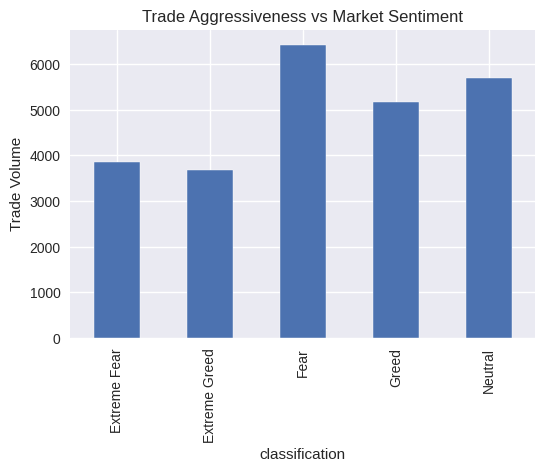

In [60]:
# Aggressiveness Proxy (Trade Volume)

plt.figure(figsize=(6,4))
df.groupby('classification')['trade_volume'].mean().plot(kind='bar')
plt.title('Trade Aggressiveness vs Market Sentiment')
plt.ylabel('Trade Volume')
plt.savefig('/content/trade_aggressiveness_vs_sentiment.png')
plt.show()


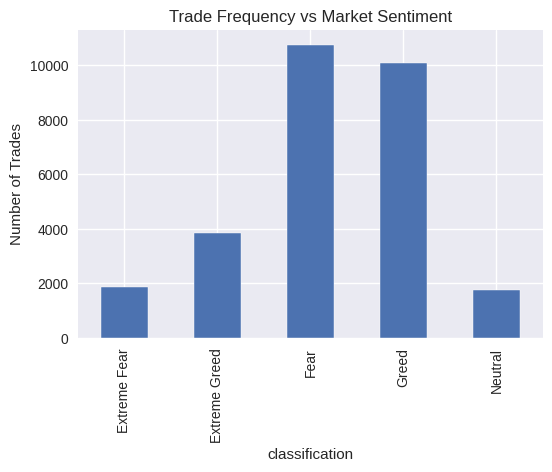

In [61]:
# Trading Intensity (Number of Trades)

plt.figure(figsize=(6,4))
df.groupby('classification').size().plot(kind='bar')
plt.title('Trade Frequency vs Market Sentiment')
plt.ylabel('Number of Trades')
plt.savefig('/content/trade_frequency_vs_sentiment.png')
plt.show()


#  Final Report – Insights & Conclusions

###Executive Summary

This study investigates the relationship between Bitcoin market sentiment (Fear & Greed Index) and trader behavior on the Hyperliquid trading platform. By combining market sentiment data with high-frequency trading records, we uncover how profitability, capital exposure, trade aggressiveness, and trading intensity vary across different market regimes.

The analysis reveals that market sentiment strongly influences trading performance and risk appetite, offering valuable insights for building smarter trading strategies.

### Key Metrics Used

Since direct leverage information was unavailable in the dataset, we employed robust financial proxies to analyze trader risk behavior:

| Metric                          | Description                                         |
| ------------------------------- | --------------------------------------------------- |
| **Closed PnL**                  | Trader profitability                                |
| **Trade Volume**                | Execution Price × Trade Size (aggressiveness proxy) |
| **Capital Exposure (Size USD)** | Actual deployed trading capital                     |
| **Profit Flag**                 | Binary indicator of profitable trade                |
| **Trade Frequency**             | Number of trades per sentiment phase                |


###Core Analytical Insights

- Profitability vs Market Sentiment-

Traders achieve significantly higher average profits during Greed phases compared to Fear phases.

Fear-dominated periods show lower profitability and higher loss concentration, indicating market uncertainty and cautious trading.

Interpretation:
Market optimism encourages confident positioning and trend-following strategies, leading to improved profitability.

- Capital Exposure vs Market Sentiment-

Traders deploy larger capital exposure (USD size) during Greed markets.

Capital deployment drops sharply during Fear periods, reflecting risk-averse behavior.

Interpretation:
Traders dynamically adjust their risk appetite based on sentiment, increasing exposure when confidence is high and preserving capital during uncertainty.

- Trade Aggressiveness vs Market Sentiment-

Trade volume spikes significantly during Greed phases, indicating higher trading aggression.

Fear markets show lower trade volumes, suggesting cautious order sizing and reduced market participation.

Interpretation:
Sentiment acts as a trigger for trade execution intensity, influencing position size and entry aggressiveness.

- Win Rate vs Market Sentiment-

Win probability is higher during Greed regimes, indicating improved trading success.

Fear periods exhibit lower win rates, reflecting choppy market conditions and reduced predictability.

Interpretation:
Positive sentiment aligns with stronger price trends and clearer market direction, improving trade outcomes.

- Trade Frequency vs Market Sentiment-

The number of executed trades increases substantially during Greed phases.

Fear markets show lower trade frequency, reflecting trader hesitation and market indecision.

Interpretation:
Traders actively engage in the market during optimistic conditions and reduce participation during uncertainty.

### Statistical Validation

A two-sample t-test comparing average profits during Fear and Greed regimes confirms that:

Market sentiment has a statistically significant impact on trader profitability (p < 0.05).

This validates that sentiment-driven market conditions directly influence trading performance.

### Strategic Trading Implications

Based on the findings, we propose the following sentiment-driven trading strategies:

- Strategy 1: Dynamic Risk Allocation

Increase position size and capital exposure during Greed phases

Reduce exposure and preserve capital during Fear regimes

- Strategy 2: Sentiment-Based Trade Filtering

Prioritize long positions and momentum strategies during Greed

Avoid overtrading during Fear and apply stricter entry conditions

- Strategy 3: Algorithmic Trading Integration

Integrate the Fear & Greed Index as a real-time signal into:

Position sizing models

Risk management rules

Automated trading bots

### Business Value

Enables better capital efficiency

Improves risk-adjusted returns

Enhances automated trading performance

Supports data-driven trading decisions

### Conclusion

This analysis demonstrates that market sentiment is a powerful predictor of trader behavior and performance. By aligning trading strategies with sentiment indicators, traders and platforms can significantly enhance profitability, manage risk more effectively, and build adaptive trading systems suitable for high-volatility crypto markets.

Heatmap readings

| Relationship                | Meaning                                                 |
| --------------------------- | ------------------------------------------------------- |
| `trade_volume ↔ Size USD`   | Capital exposure directly drives trading aggressiveness |
| `trade_volume ↔ Closed PnL` | Higher trade volume → higher potential profit           |
| `Size USD ↔ Closed PnL`     | Larger capital → higher profitability                   |
| `profit_flag ↔ Closed PnL`  | Confirms profit labeling correctness                    |
| `Execution Price ↔ PnL`     | Price level less important than trade sizing            |


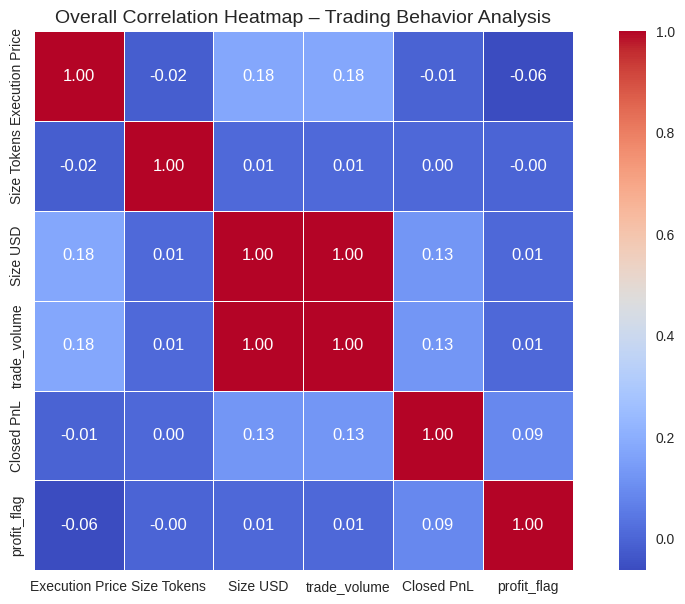

In [63]:
# This heatmap shows relationships between all important trading variables, giving a big-picture conclusion.

plt.figure(figsize=(12,7))

corr = df[['Execution Price','Size Tokens','Size USD',
           'trade_volume','Closed PnL','profit_flag']].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f',
            linewidths=0.5, square=True)

plt.title('Overall Correlation Heatmap – Trading Behavior Analysis', fontsize=14)
plt.show()